In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Helping link I dont know yet !
#https://www.linkedin.com/pulse/creating-dashboard-matplotlib-library-leonardo-a/
#http://datos.munimadrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=39cddd906cbee510VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default#

### Getting the datas from 5 years, it would be interesting to see how the Mayor of madrid change about the vehicules consomation.

In [15]:
# Ajout du fichier 
file2017 = 'Datas/VEHICULOS_PARQUE_MOVIL_2017.csv'
file2018 = 'Datas/VEHICULOS_PARQUE_MOVIL_2018.csv'
file2019 = 'Datas/VEHICULOS_PARQUE_MOVIL_2019.csv'
file2020 = 'Datas/VEHICULOS_PARQUE_MOVIL_2020.csv'
file2021 = 'Datas/VEHICULOS_PARQUE_MOVIL_2021.csv'

#Variables waiting the main function to be create on main page and called
d17 = pd.read_csv(file2017, delimiter=';')
d18 = pd.read_csv(file2018, delimiter=';')
d19 = pd.read_csv(file2019, delimiter=';')
d20 = pd.read_csv(file2020, delimiter=';')
d21 = pd.read_csv(file2021, delimiter=';')
                  




#d18 = pd.read_csv(file2018, delimiter=';')
#d17 = pd.read_csv(file, delimiter=';', usecols = ['id','direccion','longitud','latitud'])



#print(d18.shape)
#print(d17.columns)
#print(d18.columns)
#print(d18.info())


In [16]:
d17step = d17.drop_duplicates()
d18step = d18.drop_duplicates()
d19step = d19.drop_duplicates()
d20step = d20.drop_duplicates()
d21step = d21.drop_duplicates()

In [17]:
#print(d17step['ENERG�A/COMBUSTIBLE'].tolist())

## Got a bit trouble overhere ! according to the both PDF which explain the data structure, there are differences so I need to fix it !

In [18]:
#convertir les données 2017-18-19 pour mettre a jour noms
def updatedataBefore2020(datas):
    dataTab = datas.rename(columns={'ENERG�A/COMBUSTIBLE': 'ENERGÍA/COMBUSTIBLE', 'N� MPAL': 'Nº MPAL'})
    return dataTab

def updateValuesBefore2020(datas):

    dataValues = datas['ENERGÍA/COMBUSTIBLE'].replace(['EL�CTRICO','GASOLINA / HIBRIDO','EL�CTRICO / H�BRIDO'],['ELÉCTRICO','GASOLINA/HIBRIDO','ELÉCTRICO / HÍBRIDO'])
    
    return dataValues


def updateValuesStart2020(datas):

    dataValues = datas['ENERGÍA/COMBUSTIBLE'].replace(['DIESEL'],['DIESEL'])
    
    return dataValues

In [19]:

#todo - Check good practice to clean the code 

d17Tab = updatedataBefore2020(d17step)
d17Clean = updateValuesBefore2020(d17Tab).value_counts().rename_axis('unique_values').reset_index(name='1')


d18Tab = updatedataBefore2020(d18step)
d18Clean = updateValuesBefore2020(d18Tab).value_counts().rename_axis('unique_values').reset_index(name='2')


d19Tab = updatedataBefore2020(d19step)
d19Clean = updateValuesBefore2020(d19Tab).value_counts().rename_axis('unique_values').reset_index(name='3')


d20Clean = updateValuesBefore2020(d20step).value_counts().rename_axis('unique_values').reset_index(name='4')
d21Clean = updateValuesBefore2020(d21step).value_counts().rename_axis('unique_values').reset_index(name='5')
d21Clean2 = updateValuesBefore2020(d21step).value_counts().rename_axis('unique_values').reset_index(name='6')

print(d21Clean2)









             unique_values     6
0                 GASOLINA  1043
1                DIESEL      679
2                ELÉCTRICO   368
3   GAS NATURAL COMPRIMIDO   160
4       ELÉCTRICO/GASOLINA    40
5  GAS LICUADO DE PETROLEO    21
6               No precisa     8
7         DIESEL               1


### fusion consomation energy (Got probleme with "DIESEL" probably an \x16 or something black which is diff)

In [20]:

Test = pd.concat([d17Clean,d18Clean, d19Clean, d20Clean, d21Clean], axis=1)
print(Test)

      unique_values       1     unique_values       2        unique_values  \
0          GASOLINA  1099.0          GASOLINA  1050.0             GASOLINA   
1            DIESEL   867.0            DIESEL   725.0               DIESEL   
2  GASOLINA/HIBRIDO    85.0         ELÉCTRICO   133.0            ELÉCTRICO   
3    GASOLINA / GLP    84.0               GNC   113.0     GASOLINA/HIBRIDO   
4         ELÉCTRICO    47.0  GASOLINA/HIBRIDO    22.0                  GNC   
5                R.     7.0                R.     7.0  ELÉCTRICO / HÍBRIDO   
6               NaN     NaN    GASOLINA / GLP     1.0       GASOLINA / GLP   
7               NaN     NaN      GASOLINA/GNC     1.0                   R.   
8               NaN     NaN               NaN     NaN                  NaN   

       3        unique_values    4            unique_values       5  
0  793.0             GASOLINA  770                 GASOLINA  1043.0  
1  693.0              DIESEL   562                DIESEL      679.0  
2  305.0 

In [21]:
#TypeConso17 = d17Clean.groupby('ENERGÍA/COMBUSTIBLE')['Nº MPAL'].nunique()
#TypeConso18 = d18Clean.groupby('ENERGÍA/COMBUSTIBLE')['Nº MPAL'].nunique()
#TypeConso19 = d19Clean.groupby('ENERGÍA/COMBUSTIBLE')['Nº MPAL'].nunique()
#TypeConso20 = d20Clean.groupby('ENERGÍA/COMBUSTIBLE')['Nº MPAL'].nunique()
#TypeConso21 = d21Clean.groupby('ENERGÍA/COMBUSTIBLE')['Nº MPAL'].nunique()


AxesSubplot(0.125,0.125;0.775x0.755)


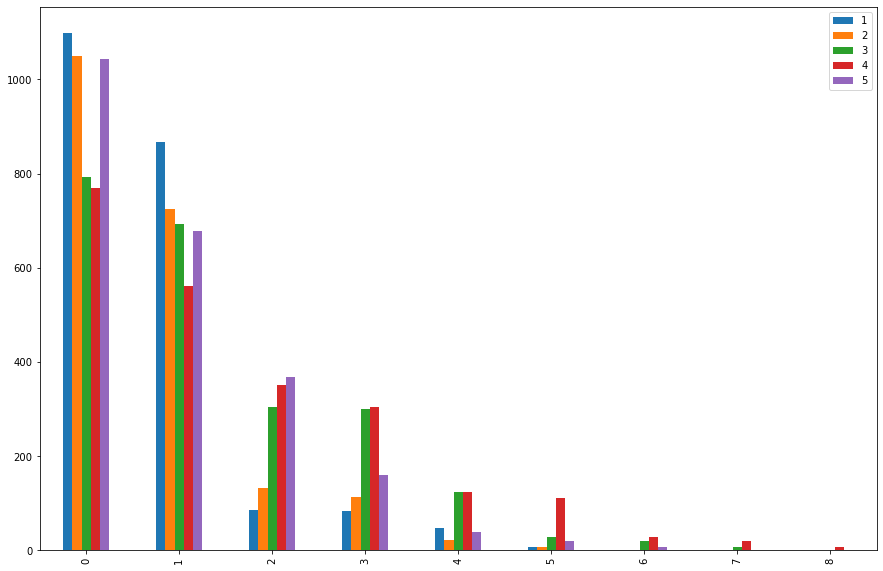

In [22]:
#TotalConso = pd.concat([TypeConso17,TypeConso18, TypeConso19, TypeConso20, TypeConso21], axis=1)
#print (TypeConso17)
#print (TypeConso20)
#
chartTotal = Test.plot.bar(figsize=(15,10));

print(chartTotal)

## To do : Fix it, this is close to an exploitable view, we can see the boom of the Electric by year


In [13]:


##rename the concat

Test2 = pd.concat([d17Clean,d18Clean], axis=1)
print(Test2)


      unique_values  counts     unique_values  counts
0          GASOLINA  1099.0          GASOLINA    1050
1            DIESEL   867.0            DIESEL     725
2  GASOLINA/HIBRIDO    85.0         ELÉCTRICO     133
3    GASOLINA / GLP    84.0               GNC     113
4         ELÉCTRICO    47.0  GASOLINA/HIBRIDO      22
5                R.     7.0                R.       7
6               NaN     NaN    GASOLINA / GLP       1
7               NaN     NaN      GASOLINA/GNC       1
